# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 2.3MB/s eta 0:00:01
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [11]:
len(movies)

244914

### List all Batman movies ever made

In [12]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [13]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [14]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [24]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print(hp_df.sort_values(by='year', ascending=False))

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [12]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [25]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [27]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [35]:
hamlet = movies[movies.title == 'Hamlet']

len(hamlet)

         title  year
1931    Hamlet  2009
8214    Hamlet  1976
46344   Hamlet  1921
55639   Hamlet  2000
73869   Hamlet  1948
98326   Hamlet  1990
118535  Hamlet  1913
124506  Hamlet  1911
140203  Hamlet  1954
155004  Hamlet  1964
178290  Hamlet  2014
180979  Hamlet  1987
181090  Hamlet  1910
186137  Hamlet  2015
191940  Hamlet  2016
218339  Hamlet  1973
222156  Hamlet  1969
227953  Hamlet  2011
241149  Hamlet  1996
244747  Hamlet  2017


20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [37]:
print(hamlet.sort_values(by='year', ascending=True))

         title  year
181090  Hamlet  1910
124506  Hamlet  1911
118535  Hamlet  1913
46344   Hamlet  1921
73869   Hamlet  1948
140203  Hamlet  1954
155004  Hamlet  1964
222156  Hamlet  1969
218339  Hamlet  1973
8214    Hamlet  1976
180979  Hamlet  1987
98326   Hamlet  1990
241149  Hamlet  1996
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [60]:
inception_s = cast[(cast.title == 'Inception') & (pd.isnull(cast.n) == True)]
print(inception_s)
print(len(inception_s))


             title  year                     name     type  \
98153    Inception  2010     Michael (III) August    actor   
197877   Inception  2010                 Ken Bhan    actor   
374661   Inception  2010            John Ceallach    actor   
497161   Inception  2010             Garvin Cross    actor   
684098   Inception  2010            Seve Esposito    actor   
690634   Inception  2010      Marcus (II) Everett    actor   
707642   Inception  2010  Zachary Christopher Fay    actor   
836295   Inception  2010        Daniel Girondeaud    actor   
1006636  Inception  2010          Andrew Hoagland    actor   
1095095  Inception  2010          Charles Jarrell    actor   
1108755  Inception  2010            Seong-hwan Jo    actor   
1120184  Inception  2010          Alonzo F. Jones    actor   
1189066  Inception  2010               Mobin Khan    actor   
1248176  Inception  2010            Shunsaku Kud?    actor   
1296268  Inception  2010         John (IX) Lawson    actor   
1312335 

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [61]:
inception_m = cast[(cast.title == 'Inception') & (pd.isnull(cast.n) == False)]
print(inception_m)
print(len(inception_m))

             title  year                  name     type  \
149008   Inception  2010          Peter Basham    actor   
183937   Inception  2010          Tom Berenger    actor   
260128   Inception  2010        Virgile Bramly    actor   
326745   Inception  2010         Michael Caine    actor   
333415   Inception  2010          Earl Cameron    actor   
433867   Inception  2010         Nicolas Clerc    actor   
444385   Inception  2010        Adam (IV) Cole    actor   
517227   Inception  2010    Jean-Michel Dagory    actor   
590576   Inception  2010     Leonardo DiCaprio    actor   
709436   Inception  2010             Russ Fega    actor   
737322   Inception  2010      Mark Fleischmann    actor   
807795   Inception  2010        Michael Gaston    actor   
812135   Inception  2010       Johnathan Geare    actor   
832083   Inception  2010         Carl Gilliard    actor   
833376   Inception  2010           Jack Gilroy    actor   
859993   Inception  2010  Joseph Gordon-Levitt    actor 

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [63]:
top = inception_m.sort_values(by='n', ascending=True)
top.head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [64]:
dd = cast[(cast.character == 'Albus Dumbledore')]
print(dd)

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

In [66]:
dd = cast[(cast.character == 'Albus Dumbledore')]
print(dd.name.unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [68]:
kr = cast[(cast.name == 'Keanu Reeves')]
#print(kr)
print(len(kr))

62


In [71]:
kr_lead = kr[(kr.n == 1) & (kr.year >= 1999)]
print(kr_lead.sort_values(by='year', ascending=True))


                                 title  year          name   type  \
1892390                     The Matrix  1999  Keanu Reeves  actor   
1892397               The Replacements  2000  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892399                The Whole Truth  2016  Keanu Reeves  actor   
1892362           John Wick: Chapt

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [76]:
actor_or_actress_from_50_to_60 = cast[((cast.type == 'actor') | (cast.type == 'actress')) & ((cast.year >= 1950) & (cast.year <= 1960))]
#print(actor_or_actress_from_50_to_60.sort_values(by='year', ascending=True))
print(len(actor_or_actress_from_50_to_60))

234635


In [78]:
actor_or_actress_from_07_to_17 = cast[((cast.type == 'actor') | (cast.type == 'actress')) & ((cast.year >= 2007) & (cast.year <= 2017))]
#print(actor_or_actress_from_07_to_17.sort_values(by='year', ascending=True))
print(len(actor_or_actress_from_07_to_17))





1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [79]:
leading_roles_from_2000 = cast[(cast.n == 1) & (cast.year >= 2000)]
print(len(leading_roles_from_2000))

60568


In [82]:
count_non_leading_roles_from_2000 = len(cast[cast.year >= 2000]) - len(leading_roles_from_2000)
print(count_non_leading_roles_from_2000)
non_leading_roles_from_2000 = cast[(cast.n != 1) & (cast.year >= 2000)]
print(len(non_leading_roles_from_2000))

1889194
1889194


In [85]:
support_cast = non_leading_roles_from_2000[pd.isnull(non_leading_roles_from_2000.n)]
print(len(support_cast))
support_cast.head()

887484


,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [15]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

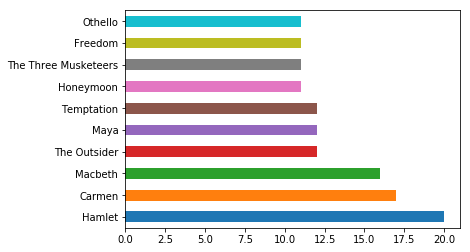

In [16]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [129]:
movies_released_in_2000s = movies[movies.year >= 2000]
s = movies_released_in_2000s.groupby(['year']).size().sort_values(ascending=False)
s.head(3)

year
2017    11474
2016     9440
2015     8702
dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

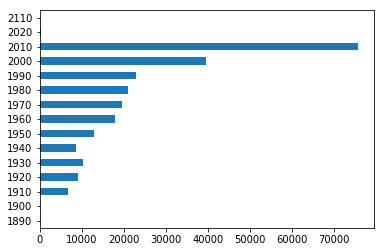

In [19]:
movies['decade'] = (movies['year'] / 10).astype(dtype='int32')
movies['decade'] = movies['decade'] * 10
#movies.head()
by_decade = movies.decade.value_counts().sort_index()
by_decade.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [21]:
by_character_name = cast.character.value_counts()
by_character_name.head(10)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [25]:
herself = cast[cast['character'] == 'Herself']
herself.head()
name_counts = herself.name.value_counts()
name_counts.head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Hillary Clinton               8
Margaret Thatcher             8
Marilyn Monroe                6
Joan Rivers                   6
Mar?a Isabel (III) Mart?n     6
Sumie Sakai                   6
Name: name, dtype: int64

In [26]:
himself = cast[cast['character'] == 'Himself']
himself.head()
name_counts = himself.name.value_counts()
name_counts.head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [44]:
zm = cast[cast['character'].str.startswith('Zombie')]
zm.character.value_counts()[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [45]:
police = cast[cast['character'].str.startswith('Police')]
police.character.value_counts()[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

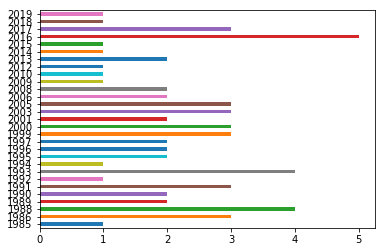

In [69]:
kr = cast[cast.name == 'Keanu Reeves']
kr_by_year = kr.sort_values(by='year')
by_year = kr_by_year.year.value_counts().sort_index()
by_year.plot(kind='barh')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


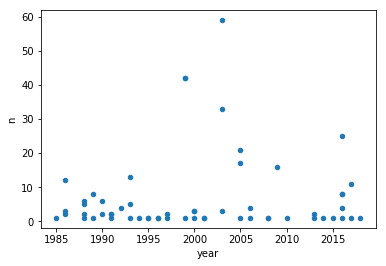

In [75]:
#df.plot.scatter(x='a', y='b');
kr = cast[cast.name == 'Keanu Reeves'].dropna()
kr_by_year = kr.sort_values(by='year')
kr_by_year.head()
kr_by_year.plot.scatter(x='year', y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

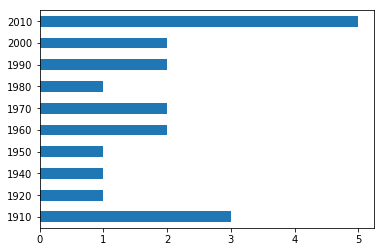

In [60]:
hamlet = movies[movies.title == 'Hamlet']
hamlet.head()
hamlet_by_decade = hamlet.decade.value_counts().sort_index()
hamlet_by_decade.plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [67]:

cast['decade'] = (cast['year'] / 10).astype(dtype='int32')
cast['decade'] = cast['decade'] * 10
all_60s = cast[cast['decade'] == 1960]
len(all_60s)
leading_60s = all_60s[all_60s['n'] == 1]
print(len(leading_60s))
#leading_60s.head()
#print(leading_60s.type.value_counts())

11823
actor      8320
actress    3503
Name: type, dtype: int64


In [71]:
all_2000s = cast[cast['decade'] == 2000]
len(all_2000s)
leading_2000s = all_2000s[all_2000s['n'] == 1]
print(len(leading_2000s))
#print(leading_2000s.head())
#print(leading_2000s.type.value_counts())

26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [67]:
#cast = pd.read_csv('cast.csv.bz2', compression='bz2')
#cast.head()
frank = cast[cast['name'] == 'Frank Oz']
frank['Count'] = frank.groupby(['title'])['title'].transform('count')
frank_more_than_one = frank[frank['Count'] > 1]
print(len(frank_more_than_one))
f = frank_more_than_one[['year', 'Count', 'title']].drop_duplicates().sort_values('year')
print(f)


46
         year  Count                                 title
1723645  1979      8                      The Muppet Movie
1723598  1981      2        An American Werewolf in London
1723632  1981      6                The Great Muppet Caper
1723629  1982      2                      The Dark Crystal
1723653  1984      7            The Muppets Take Manhattan
1723601  1985      3                      Follow That Bird
1723638  1992      7            The Muppet Christmas Carol
1723608  1996      4                Muppet Treasure Island
1723612  1999      4                    Muppets from Space
1723625  1999      3  The Adventures of Elmo in Grouchland


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [68]:
f = frank_more_than_one[['year', 'Count', 'title', 'character']].drop_duplicates().sort_values('year')
print(f)

         year  Count                                 title  \
1723652  1979      8                      The Muppet Movie   
1723651  1979      8                      The Muppet Movie   
1723650  1979      8                      The Muppet Movie   
1723649  1979      8                      The Muppet Movie   
1723648  1979      8                      The Muppet Movie   
1723647  1979      8                      The Muppet Movie   
1723646  1979      8                      The Muppet Movie   
1723645  1979      8                      The Muppet Movie   
1723598  1981      2        An American Werewolf in London   
1723637  1981      6                The Great Muppet Caper   
1723635  1981      6                The Great Muppet Caper   
1723634  1981      6                The Great Muppet Caper   
1723633  1981      6                The Great Muppet Caper   
1723632  1981      6                The Great Muppet Caper   
1723636  1981      6                The Great Muppet Caper   
1723599 

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

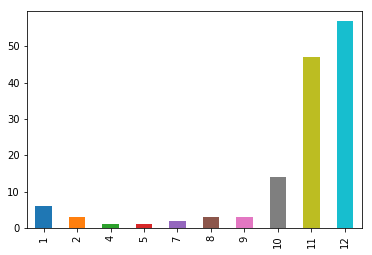

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

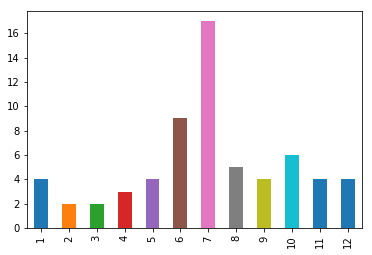

In [76]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

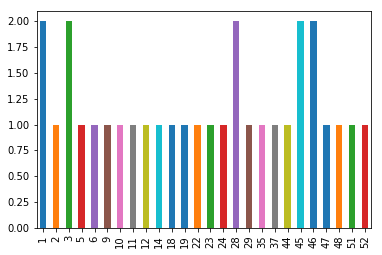

In [78]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [92]:
kr = cast[(cast.name == 'Keanu Reeves')]
kr_lead = kr[(kr.n == 1)]

usa_movies = release_dates[(release_dates.country == 'USA')]
#print(kr_lead.head())
#print(usa_movies .head())
kr_with_us_release_dates = kr_lead.merge(usa_movies, on='title').sort_values('date')
print(len(kr_with_us_release_dates))
print(kr_with_us_release_dates)

26
                               title  year_x          name   type  \
14                             Speed    1994  Keanu Reeves  actor   
15                             Speed    1994  Keanu Reeves  actor   
18                    Sweet November    2001  Keanu Reeves  actor   
24                  The Night Before    1988  Keanu Reeves  actor   
3   Bill & Ted's Excellent Adventure    1989  Keanu Reeves  actor   
2         Bill & Ted's Bogus Journey    1991  Keanu Reeves  actor   
13                     Little Buddha    1993  Keanu Reeves  actor   
16                             Speed    1994  Keanu Reeves  actor   
10                   Johnny Mnemonic    1995  Keanu Reeves  actor   
1               A Walk in the Clouds    1995  Keanu Reeves  actor   
4                     Chain Reaction    1996  Keanu Reeves  actor   
6                  Feeling Minnesota    1996  Keanu Reeves  actor   
21              The Devil's Advocate    1997  Keanu Reeves  actor   
23                        The M

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

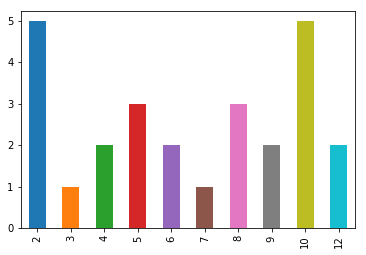

In [94]:
kr = cast[(cast.name == 'Keanu Reeves')]
kr_lead = kr[(kr.n == 1)]

usa_movies = release_dates[(release_dates.country == 'USA')]
#print(kr_lead.head())
#print(usa_movies .head())
kr_with_us_release_dates = kr_lead.merge(usa_movies, on='title').sort_values('date')
#print(len(kr_with_us_release_dates))
#print(kr_with_us_release_dates)
kr_with_us_release_dates.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

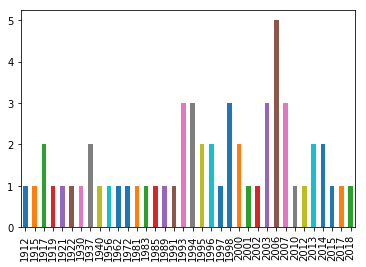

In [95]:
im = cast[(cast.name == 'Ian McKellen')]
usa_movies = release_dates[(release_dates.country == 'USA')]
im_with_us_release_dates = im.merge(usa_movies, on='title').sort_values('date')
im_with_us_release_dates.date.dt.year.value_counts().sort_index().plot(kind='bar')